## Importing Packages and Dataset

In [39]:
import numpy as np

import pandas as pd

from scipy.stats import norm

from matplotlib import pyplot as plt

In [40]:
data  = pd.read_excel('../barnstable_analysis_data.xlsx', sheet_name=1)

## Excess Return, Cumulative Return Factor and Log Returns

In [41]:
data['excess_ret_SPX'] = data['SPX'] - data['TB1M']

data['cum_ret_factor_SPX'] = (1 + data['SPX'])
data['cum_ret_factor_TB1M'] = (1 + data['TB1M'])
data['cum_ret_factor_excess_SPX'] = (1 + data['excess_ret_SPX'])

data['log_ret_SPX'] = np.log(data['cum_ret_factor_SPX'])
data['log_ret_TB1M'] = np.log(data['cum_ret_factor_TB1M'])
data['log_ret_excess_SPX'] = np.log(data['cum_ret_factor_excess_SPX'])

data.drop(columns=['cum_ret_factor_SPX', 'cum_ret_factor_TB1M', 'cum_ret_factor_excess_SPX'], inplace=True)

## Subsamples and Full Sample Assignment

In [42]:
subsample1 = data[(data['date'] >= '1965-01-01') & (data['date'] <= '1999-12-31')]
subsample2 = data[(data['date'] >= '2000-01-01')]
fullsample = data.copy()

## Summary Statistics

In [43]:
# Annualized Return for Subsamples
subsample1_annualized_return = subsample1.select_dtypes(include=np.number).mean() * 12

subsample2_annualized_return = subsample2.select_dtypes(include=np.number).mean() * 12

fullsample_annualized_return = fullsample.select_dtypes(include=np.number).mean() * 12

# Annualized Volatility for Subsamples
subsample1_annualized_volatility = subsample1.select_dtypes(include=np.number).std() * np.sqrt(12)

subsample2_annualized_volatility = subsample2.select_dtypes(include=np.number).std() * np.sqrt(12)

fullsample_annualized_volatility = fullsample.select_dtypes(include=np.number).std() * np.sqrt(12)

In [44]:
annualized_returns = pd.concat(
    [subsample1_annualized_return, subsample2_annualized_return, fullsample_annualized_return],
    keys=['Subsample 1', 'Subsample 2', 'Full Sample'],
    axis=1
)
annualized_vols = pd.concat(
    [subsample1_annualized_volatility, subsample2_annualized_volatility, fullsample_annualized_volatility],
    keys=['Subsample 1', 'Subsample 2', 'Full Sample'],
    axis=1
)

summary_stats = pd.concat(
    [annualized_returns, annualized_vols],
    keys=['Annualized Return', 'Annualized Volatility'],
    axis=1
)

summary_stats

Annualized Return                          \
                         Subsample 1 Subsample 2 Full Sample   
SPX                         0.129354    0.087542    0.115529   
TB1M                        0.061503    0.017451    0.031928   
excess_ret_SPX              0.068660    0.070091    0.083308   
log_ret_SPX                 0.117600    0.075553    0.097821   
log_ret_TB1M                0.061320    0.017423    0.031850   
log_ret_excess_SPX          0.057161    0.058143    0.065673   

                   Annualized Volatility                          
                             Subsample 1 Subsample 2 Full Sample  
SPX                             0.149405    0.152815    0.186650  
TB1M                            0.007179    0.005553    0.008507  
excess_ret_SPX                  0.150227    0.153093    0.187329  
log_ret_SPX                     0.149568    0.153763    0.185938  
log_ret_TB1M                    0.007132    0.005541    0.008473  
log_ret_excess_SPX              0.151207    0.154227    0.186914

#### Subsample 1 (1965 - 1999) shows a higher return than Subsample 2 (2000 - 2024). This may be due to market downturns during the dot-com crash and the financial crisis. Log returns are lower than level returns, and the difference is more pronounced in periods of higher volatility.

In [45]:
sharpe_ratio_subsample1 = (subsample1['log_ret_excess_SPX'].mean() / subsample1['log_ret_excess_SPX'].std()) * np.sqrt(12)
underperformance_subsample1 = norm.cdf(-np.sqrt(34) * (sharpe_ratio_subsample1))
underperformance_subsample1_15 = norm.cdf(-np.sqrt(15) * (sharpe_ratio_subsample1))
underperformance_subsample1_30 = norm.cdf(-np.sqrt(30) * (sharpe_ratio_subsample1))

pd.DataFrame({
    'Sharpe Ratio': [sharpe_ratio_subsample1],
    'Underperformance (Subsample 1)': [underperformance_subsample1],
    'Underperformance (15 years)': [underperformance_subsample1_15],
    'Underperformance (30 years)': [underperformance_subsample1_30]
}, index=['Subsample 1'])

,Sharpe Ratio,Underperformance (Subsample 1),Underperformance (15 years),Underperformance (30 years)
Subsample 1,0.378033,0.013752,0.071581,0.019199


Text(0, 0.5, 'Underperformance')

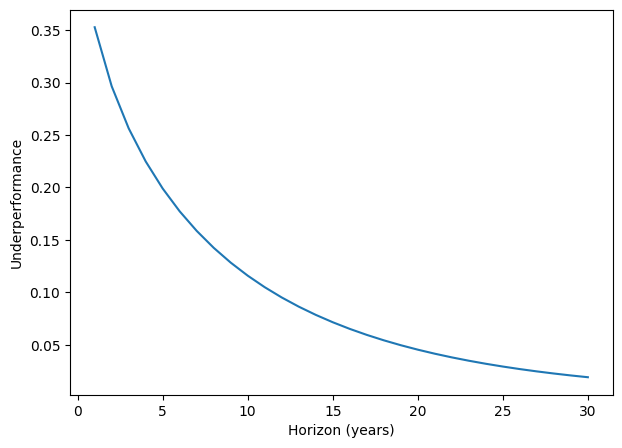

In [49]:
# Plot underperformance for Subsample 1 across horizons
horizons = np.arange(1, 31)
underperformance = norm.cdf(-np.sqrt(horizons) * (sharpe_ratio_subsample1))

plt.figure(figsize=(7, 5))
plt.plot(horizons, underperformance, label='Underperformance')
plt.xlabel('Horizon (years)')
plt.ylabel('Underperformance')